In [4]:
import numpy  as np
import pandas as pd

# 시각화
import matplotlib.pyplot as plt 
%matplotlib inline


import json 

import warnings
warnings.filterwarnings(action='ignore')

from datetime import date, datetime, timedelta
from dateutil.parser import parse



# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False



print('numpy version  - ' , np.__version__)
print('pandas version - ' , pd.__version__)

numpy version  -  1.20.3
pandas version -  1.3.4


- auto-mpg.csv 실습

In [4]:
mpg_frm = pd.read_csv('./visualization_data/auto-mpg.csv' , header = None)
mpg_frm.columns = ['mpg' , 'cylinders' , 'displacement' , 'horsepower' , 'weight' , 'acceleration' , 'model year' , 'origin' , 'name']
mpg_frm

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


- 분포를 확인할 때 히스토그램

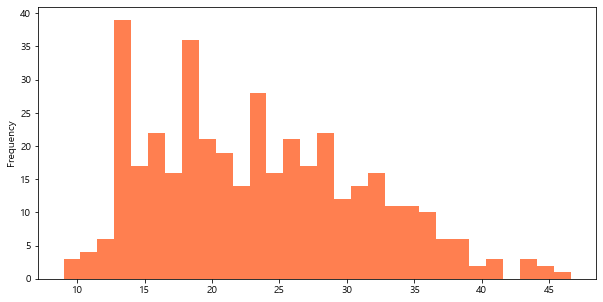

In [14]:
mpg_frm['mpg'].plot(kind = 'hist' , bins = 30 , figsize = (10, 5) , color = 'coral')

plt.show()
plt.close()

- car-mpg.xlsx 실습

In [5]:
tmp_frm = pd.read_excel('./visualization_data/car_mpg.xlsx' , header = 0   )
tmp_frm.drop('Unnamed: 0' , axis = 1 , inplace = True) 
tmp_frm

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [18]:
tmp_frm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


 양적 자료의 데이터 분포 확인 - 


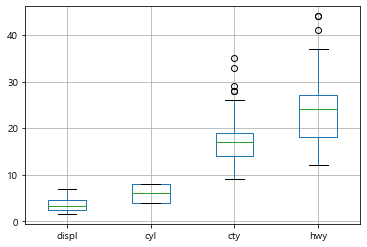

In [20]:
print(' 양적 자료의 데이터 분포 확인 - ') 

tmp_frm[['displ' , 'cyl' , 'cty' , 'hwy']].boxplot()

plt.show()
plt.close()

In [23]:
print(' 질적 자료에 대한 데이터 빈도 확인 - value_counts() ')
print(' 제조회사, 모델명, 변속기 종류, 구동방식, 연료종류, 자동차 종류')

tmp_frm['manufacturer'].value_counts()

 질적 자료에 대한 데이터 빈도 확인 - value_counts() 
 제조회사, 모델명, 변속기 종류, 구동방식, 연료종류, 자동차 종류


dodge         37
toyota        34
volkswagen    27
ford          25
chevrolet     19
audi          18
hyundai       14
subaru        14
nissan        13
honda          9
jeep           8
pontiac        5
land rover     4
mercury        4
lincoln        3
Name: manufacturer, dtype: int64

#### 이상치 정제
- car_mpg 데이터에서 구동방식별 고속도로 연비 평균과 도시연비 평균을 극단치를 제외하고 확인
- 각 연비별 이상치 확인 boxplot()

<AxesSubplot:>

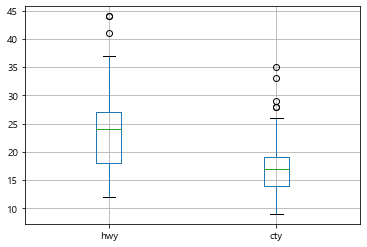

In [7]:
outlier_frm = tmp_frm.filter(['hwy' , 'cty' ])
outlier_frm.boxplot()

In [11]:
print('사분위수 정보 확인 함수? - ')
outlier_frm.quantile(q=0.75)

사분위수 정보 확인 함수? - 


hwy    27.0
cty    19.0
Name: 0.75, dtype: float64

In [12]:
print('IQR (3 - 1)')
iqr = outlier_frm.quantile(q=0.75) - outlier_frm.quantile(q=0.25)
iqr 

IQR (3 - 1)


hwy    9.0
cty    5.0
dtype: float64

In [29]:
print( 'inner fence Q1 - 1.5 * IOR   , Q3 + 1.5 * IOR ')
print( 'outer fence Q1 - 3   * IOR   , Q3 +   3 * IOR ')
print()
lower = outlier_frm.quantile(q=0.25) - 1.5 * iqr
upper = outlier_frm.quantile(q=0.75) + 1.5 * iqr

lower_outlier = outlier_frm[ outlier_frm > lower ].min()
upper_outlier = outlier_frm[ outlier_frm < upper ].max()

print('아래 수평선 - \n' , lower_outlier)
print('위   수평선 - \n' , upper_outlier)

inner fence Q1 - 1.5 * IOR   , Q3 + 1.5 * IOR 
outer fence Q1 - 3   * IOR   , Q3 +   3 * IOR 

아래 수평선 - 
 hwy    12
cty     9
dtype: int64
위   수평선 - 
 hwy    37.0
cty    26.0
dtype: float64


In [41]:
print('고속도로 연비의 이상치 데이터 추출 - ' , upper_outlier['hwy'])

display( tmp_frm.loc[tmp_frm['hwy'] > upper_outlier['hwy'] , : ] )

hwy_s_idx = tmp_frm.loc[tmp_frm['hwy'] > upper_outlier['hwy'] , ['hwy'] ]

print()
print('도시     연비의 이상치 데이터 추출 - ' , upper_outlier['cty'])

display( tmp_frm.loc[tmp_frm['cty'] > upper_outlier['cty'] , : ] )

cty_s_idx = tmp_frm.loc[tmp_frm['cty'] > upper_outlier['cty'] , ['cty'] ] 

고속도로 연비의 이상치 데이터 추출 -  37.0


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact



도시     연비의 이상치 데이터 추출 -  26.0


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
99,honda,civic,1.6,1999,4,manual(m5),f,28,33,r,subcompact
196,toyota,corolla,1.8,2008,4,manual(m5),f,28,37,r,compact
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact


In [39]:
print('이상치 정제 - 결측값으로 변환 후 중위수 값으로 대체 - ') 
print()
outlier_clean_frm = tmp_frm.copy()
outlier_clean_frm 

이상치 정제 - 결측값으로 변환 후 중위수 값으로 대체 - 



,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [45]:
for idx  in hwy_s_idx.index : 
    outlier_clean_frm.loc[idx , 'hwy'] = np.NaN

for idx  in cty_s_idx.index : 
    outlier_clean_frm.loc[idx , 'cty'] = np.NaN


In [49]:
print('hwy NaN - ' , outlier_clean_frm['hwy'].isna().sum() )
print('cty NaN - ' , outlier_clean_frm['cty'].isna().sum() )


hwy NaN -  3
cty NaN -  5


In [51]:
print('중위수 대체 hwy , cty - ') 
for idx in hwy_s_idx.index : 
    outlier_clean_frm.loc[idx, 'hwy'] = outlier_clean_frm['hwy'].median()

for idx in cty_s_idx.index : 
    outlier_clean_frm.loc[idx, 'cty'] = outlier_clean_frm['cty'].median()


중위수 대체 hwy , cty - 


이상치 처리 후 박스플롯 - 


<AxesSubplot:>

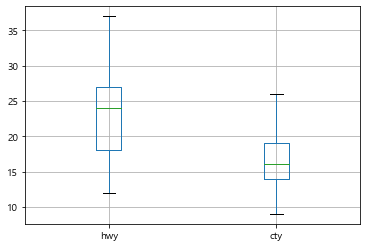

In [53]:
print('이상치 처리 후 박스플롯 - ')
outlier_frm = outlier_clean_frm.filter(['hwy' , 'cty' ])
outlier_frm.boxplot()

구동방식별 고속도로, 도시 연비 평균을 막대그래프로 시각화 한다면? - 


<AxesSubplot:xlabel='drv'>

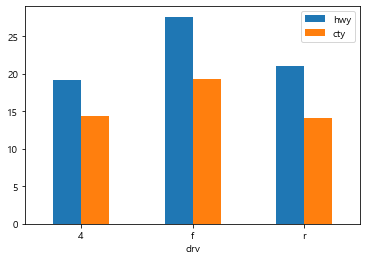

In [59]:
print('구동방식별 고속도로, 도시 연비 평균을 막대그래프로 시각화 한다면? - ')

outlier_clean_frm[['drv' , 'hwy' , 'cty']].groupby('drv').mean().plot(kind = 'bar' , rot = 0  )